# 中国人口分析
**作者**：陈艺荣    
**主页**: http://www.yirongchen.com/    
**依赖**：python3.7、pytorch1.3.0    

In [1]:
# 导入相应包
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from cpa import PAnet
%matplotlib inline

C:\Users\cc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


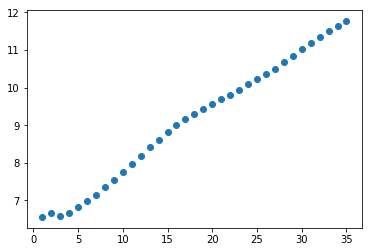

In [2]:
# 导入数据
year = torch.unsqueeze(torch.range(start=1959, end=1993, step=1, out=None), dim=1) 
year = year - 1958  # year-1958
cp = torch.unsqueeze(torch.tensor([6.55, 6.67, 6.6, 6.66, 6.82, 6.98, 7.15, 7.35, 7.55,
                   7.75, 7.96, 8.18, 8.41, 8.62, 8.82, 9.0, 9.16, 9.31,
                   9.43, 9.56, 9.69, 9.81, 9.94, 10.09, 10.23, 10.37, 10.51,
                   10.67, 10.84, 11.02, 11.19, 11.35, 11.51, 11.65, 11.78
                  ]), dim=1)   # 单位：亿
plt.scatter(year.data.numpy(), cp.data.numpy())
plt.show()

In [3]:
# 训练并且保存网络函数
def trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS):
    '''
    EPOCH          训练次数
    LR             学习率
    HIDDEN_SIZE    隐藏层网络宽度
    HIDDEN_LAYERS  隐藏层深度
    
    '''
    time = np.arange(EPOCH)   # 产生自变量
    loss_list = []
    cn_panet = PAnet(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1, hidden_num=HIDDEN_LAYERS-1)     # define the network
    print(cn_panet)  # net architecture
    optimizer = torch.optim.SGD(cn_panet.parameters(), lr=LR)  # 调小学习率
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
    for t in range(EPOCH):
        prediction = cn_panet(year)          # input x and predict based on x
        loss = loss_func(prediction, cp)     # must be (1. nn output, 2. target)
        loss_list.append(loss)

        optimizer.zero_grad()                # clear gradients for next train
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients    
    torch.save(cn_panet, 'cn_panet.pkl')  # save entire net
    print("成功保存网络")
    return time, loss_list

In [4]:
# 读取网络模型函数
def restore_net(netname):
    # restore entire net1 to net2
    net = torch.load(netname)
    return net

PAnet(
  (hidden1): Linear(in_features=1, out_features=32, bias=True)
  (hidden2): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=32, bias=True)
    (6): Linear(in_features=32, out_features=32, bias=True)
  )
  (predict): Linear(in_features=32, out_features=1, bias=True)
)


C:\Users\cc\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type PAnet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\cc\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\cc\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ModuleList. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


成功保存网络


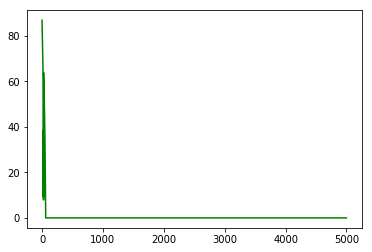

In [5]:
# 根据自己在上周获得的最优参数进行配置
EPOCH = 5000 # 训练次数
LR = 0.003 # 学习率
HIDDEN_SIZE = 32 # 隐藏层网络宽度
HIDDEN_LAYERS = 8 # 隐藏层深度
time, loss_list_02 = trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS)
plt.plot(time, loss_list_02, 'g-', label='损失函数曲线') 

In [6]:
reload_net = restore_net('cn_panet.pkl')
year_2019 = 2019 - 1958
year_2019 = torch.FloatTensor([[year_2019]])
print(year_2019.shape)
cp_2019 = reload_net(year_2019)
print("预测的2019年人口为：",cp_2019.item(),"亿")

torch.Size([1, 1])
预测的2019年人口为： 15.819079399108887 亿
